In [1]:
from ultralytics import YOLO
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [2]:
models_dir = Path('./models')
FOLDER_PATH = Path('predict-img')
DET_MODEL_NAME = "best"

In [3]:
det_model_path = models_dir / f"{DET_MODEL_NAME}_openvino_model/{DET_MODEL_NAME}.xml"
if not det_model_path.exists():
    det_model.export(format="openvino", dynamic=True, half=False)

In [4]:
import ipywidgets as widgets
import openvino as ov

core = ov.Core()

device = widgets.Dropdown(
    options=core.available_devices + ["CPU"],
    value='CPU',
    description='Device:',
    disabled=False,
)

device

Dropdown(description='Device:', options=('CPU', 'CPU'), value='CPU')

In [5]:
core = ov.Core()

det_ov_model = core.read_model(det_model_path)
det_ov_model.reshape({0: [1, 3, 640, 640]})
det_compiled_model = core.compile_model(det_ov_model, device.value)

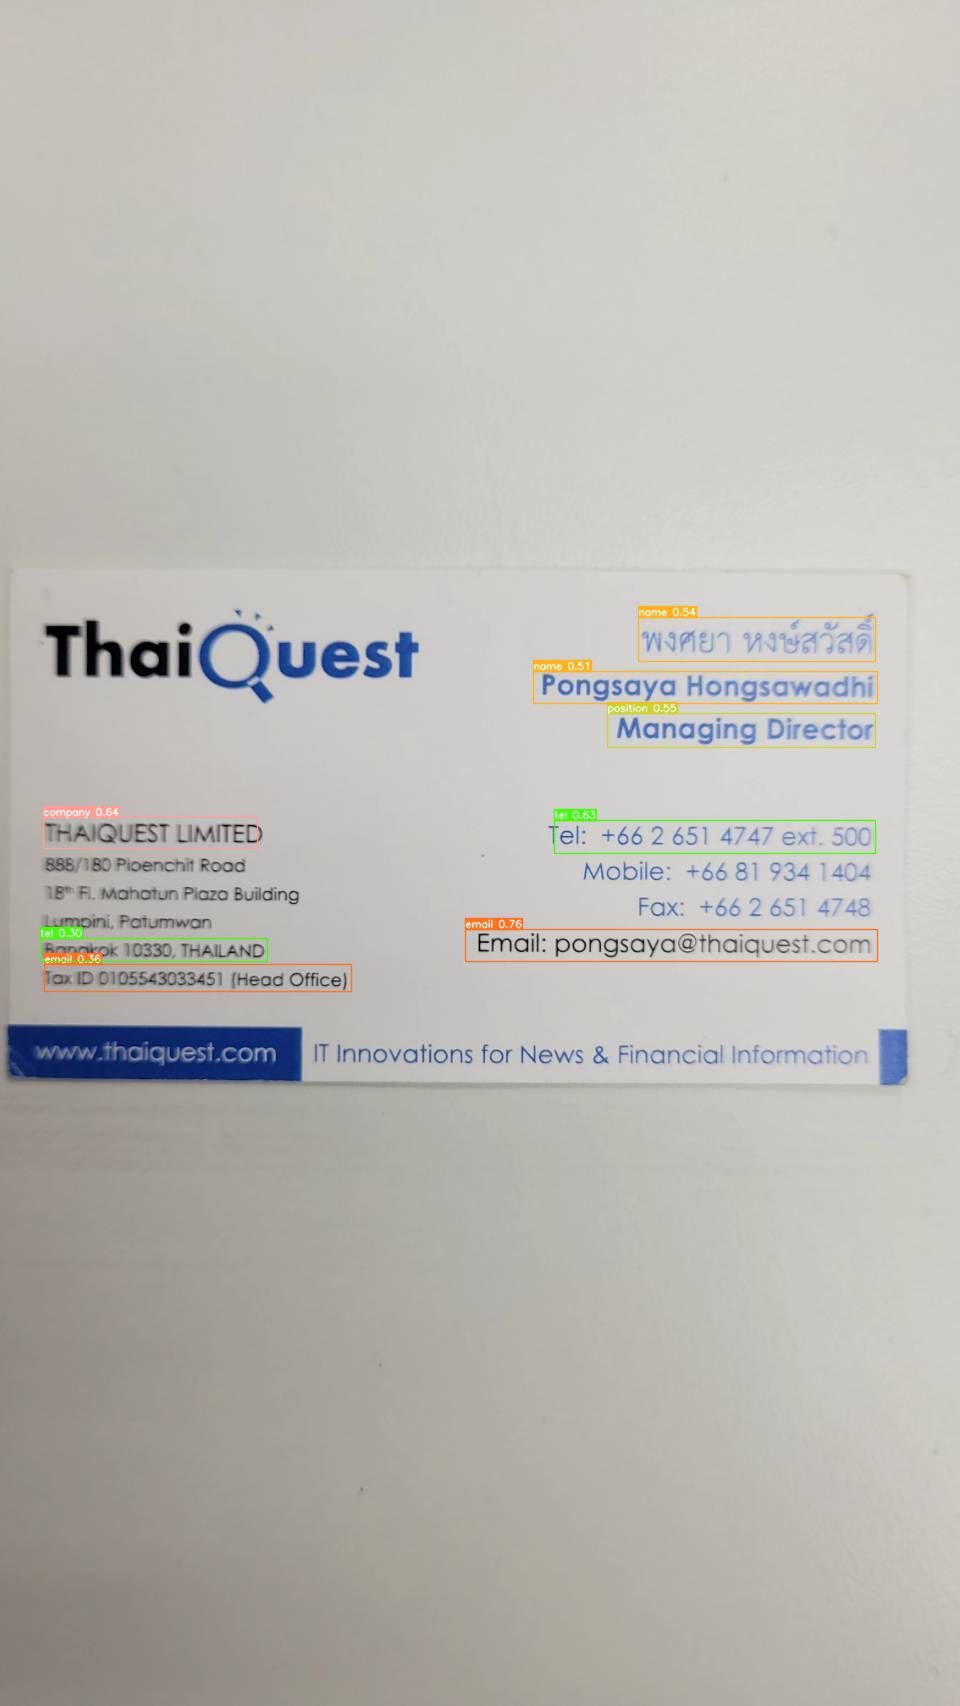

In [6]:
from set_vino.load_vino import LoadVino
det_model_path="models/best_openvino_model/best.xml"
label_map = {
    0: 'address',
    1: 'company',
    2: 'email',
    3: 'name',
    4: 'position',
    5: 'tel'
}  
selected_device = "CPU"  # Replace with code to get the selected device name

# Initialize the LoadVino class with the selected device
loader = LoadVino(det_model_path, selected_device, label_map)
# Define a function to perform detection

IMAGE_PATH = Path('predict-img/business-card-predict-1.jpg')

input_image = np.array(Image.open(IMAGE_PATH))
detections = loader.detect(input_image)


image_with_boxes = loader.draw_results(detections, input_image, label_map)

# Display the image with bounding boxes
Image.fromarray(image_with_boxes)


In [7]:
print(label_map[0])

address


In [8]:
detections

[{'det': tensor([[4.6500e+02, 9.2900e+02, 8.7700e+02, 9.6100e+02, 7.6202e-01, 2.0000e+00],
          [4.3000e+01, 8.1700e+02, 2.5700e+02, 8.4800e+02, 6.3674e-01, 1.0000e+00],
          [5.5400e+02, 8.2000e+02, 8.7500e+02, 8.5300e+02, 6.3333e-01, 5.0000e+00],
          [6.0700e+02, 7.1300e+02, 8.7500e+02, 7.4700e+02, 5.5377e-01, 4.0000e+00],
          [6.3800e+02, 6.1700e+02, 8.7500e+02, 6.6100e+02, 5.4480e-01, 3.0000e+00],
          [5.3300e+02, 6.7100e+02, 8.7700e+02, 7.0300e+02, 5.1268e-01, 3.0000e+00],
          [4.4000e+01, 9.6400e+02, 3.5100e+02, 9.9100e+02, 3.5637e-01, 2.0000e+00],
          [4.0000e+01, 9.3800e+02, 2.6700e+02, 9.6100e+02, 2.9957e-01, 5.0000e+00]])}]

In [9]:
loader.format_detection(detections, label_map)
loader.to_json()
print(loader.to_json())

{
  "status": true,
  "code": 200,
  "message": "success",
  "data": [
    {
      "confident": 0.7620235681533813,
      "label": "email",
      "description": "Object-Detection",
      "xmin": 465,
      "ymin": 929,
      "xmax": 877,
      "ymax": 961
    },
    {
      "confident": 0.6367361545562744,
      "label": "company",
      "description": "Object-Detection",
      "xmin": 43,
      "ymin": 817,
      "xmax": 257,
      "ymax": 848
    },
    {
      "confident": 0.6333339214324951,
      "label": "tel",
      "description": "Object-Detection",
      "xmin": 554,
      "ymin": 820,
      "xmax": 875,
      "ymax": 853
    },
    {
      "confident": 0.553768515586853,
      "label": "position",
      "description": "Object-Detection",
      "xmin": 607,
      "ymin": 713,
      "xmax": 875,
      "ymax": 747
    },
    {
      "confident": 0.544801652431488,
      "label": "name",
      "description": "Object-Detection",
      "xmin": 638,
      "ymin": 617,
      "xmax": 